In [21]:
import pandas as pd

# Load the data
df = pd.read_csv('./historic sensors data.csv', skiprows=3)

In [22]:
df.head()

,Unnamed: 0,result,table,_start,_stop,_time,_value,_field,_measurement,location
0,NaN,NaN,0,2019-08-28T22:00:00Z,2024-03-30T12:24:31.326624623Z,2023-07-25T13:50:42Z,472.0,co2,Sensors,am3019-testqc2090
1,NaN,NaN,0,2019-08-28T22:00:00Z,2024-03-30T12:24:31.326624623Z,2023-07-25T14:00:42Z,466.0,co2,Sensors,am3019-testqc2090
2,NaN,NaN,0,2019-08-28T22:00:00Z,2024-03-30T12:24:31.326624623Z,2023-07-25T14:10:42Z,466.0,co2,Sensors,am3019-testqc2090
3,NaN,NaN,0,2019-08-28T22:00:00Z,2024-03-30T12:24:31.326624623Z,2023-07-25T14:20:42Z,455.0,co2,Sensors,am3019-testqc2090
4,NaN,NaN,0,2019-08-28T22:00:00Z,2024-03-30T12:24:31.326624623Z,2023-07-25T14:30:42Z,463.0,co2,Sensors,am3019-testqc2090


In [23]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'result', 'table', '_measurement', '_stop', '_start'])

print(df.head())

                  _time  _value _field           location
0  2023-07-25T13:50:42Z   472.0    co2  am3019-testqc2090
1  2023-07-25T14:00:42Z   466.0    co2  am3019-testqc2090
2  2023-07-25T14:10:42Z   466.0    co2  am3019-testqc2090
3  2023-07-25T14:20:42Z   455.0    co2  am3019-testqc2090
4  2023-07-25T14:30:42Z   463.0    co2  am3019-testqc2090


In [24]:
df.columns

Index(['_time', '_value', '_field', 'location'], dtype='object')

In [25]:
df['_time'] = pd.to_datetime(df['_time'], format='ISO8601')

print(df.isnull().sum())

_time       1
_value      1
_field      1
location    1
dtype: int64


In [26]:
df.head()

,_time,_value,_field,location
0,2023-07-25 13:50:42+00:00,472.0,co2,am3019-testqc2090
1,2023-07-25 14:00:42+00:00,466.0,co2,am3019-testqc2090
2,2023-07-25 14:10:42+00:00,466.0,co2,am3019-testqc2090
3,2023-07-25 14:20:42+00:00,455.0,co2,am3019-testqc2090
4,2023-07-25 14:30:42+00:00,463.0,co2,am3019-testqc2090


In [27]:
print("Unique sensors in the dataset:")
print(df['_field'].unique())

Unique sensors in the dataset:
['co2' 'humidity' 'light_level' 'o3' 'pm10' 'pm2_5' 'pressure'
 'temperature' 'tvoc' 'battery' 'activity' nan]


In [28]:
# continue with the most relevant sensors
relevant_sensors = ['co2', 'humidity', 'temperature']
print(relevant_sensors)

['co2', 'humidity', 'temperature']


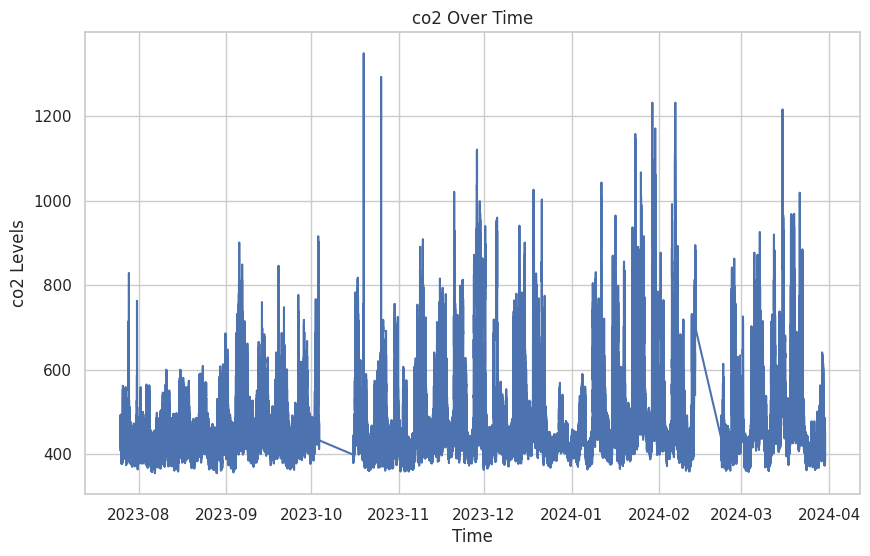

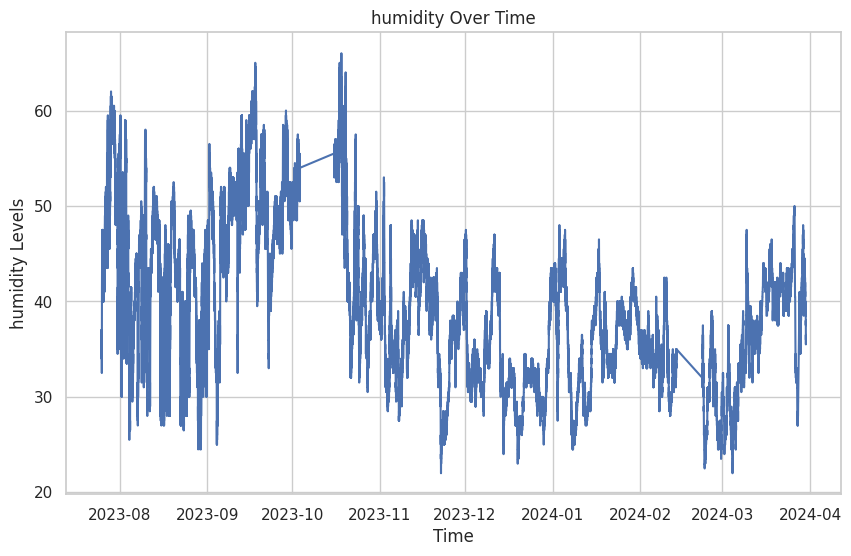

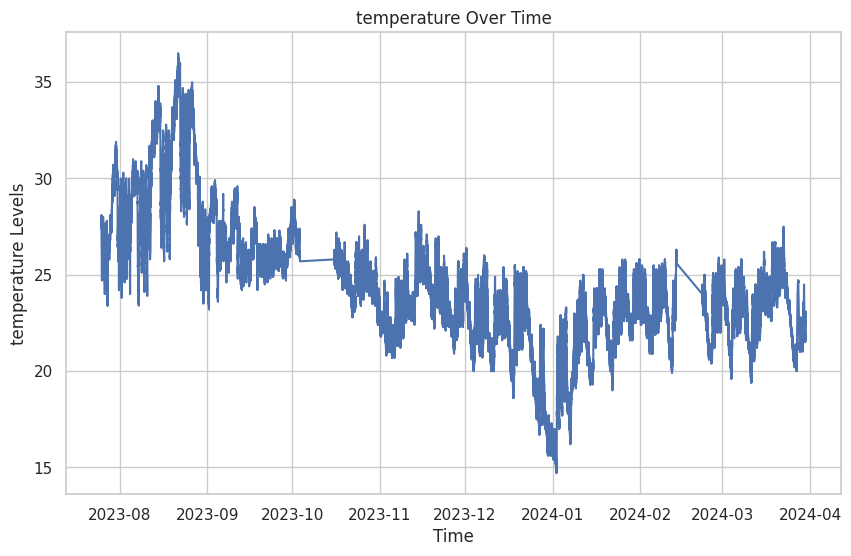

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Function to plot data for a given sensor
def plot_sensor_data(sensor_name):
    sensor_data = df[df['_field'] == sensor_name]
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='_time', y='_value', data=sensor_data)
    plt.title(f'{sensor_name} Over Time')
    plt.xlabel('Time')
    plt.ylabel(f'{sensor_name} Levels')
    plt.show()

# Plot data for each relevant sensor
for sensor in relevant_sensors:
    plot_sensor_data(sensor)


In [30]:
df = df[df['_field'].isin(relevant_sensors)] # remove irrelevant sensors

In [31]:
df['_time'] = pd.to_datetime(df['_time'], format='ISO8601')

# Create a new column 'date' that contains just the date part of '_time'
df['date'] = df['_time'].dt.date

# Group by 'location', 'date', and '_field' to calculate the daily mean of '_value'
daily_means = df.groupby(['location', 'date', '_field'], as_index=False).agg({'_value': 'mean'})

# Rename the aggregated column for clarity
daily_means.rename(columns={'_value': 'Average Daily Value', '_field':"sensor", 'date': "day"}, inplace=True)

<ipython-input-31-e1dac9e22241>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['_time'] = pd.to_datetime(df['_time'], format='ISO8601')


In [32]:
from google.colab import files

df.to_csv('Sensors_cleansed.csv', index=False)

files.download('Sensors_cleansed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
#RUN THIS ONLY FOR HOURLY DATA:

import pandas as pd
from google.colab import files  # This import is used for downloading the file in Colab

# Load the data
df = pd.read_csv('./historic sensors data.csv', skiprows=3)

# Convert '_time' to datetime and round to nearest hour
df['_time'] = pd.to_datetime(df['_time'], format='ISO8601')
df['hour'] = df['_time'].dt.round('H')  # Round to the nearest hour

# Filter to keep only relevant sensors
relevant_sensors = ['co2', 'humidity', 'temperature']
df = df[df['_field'].isin(relevant_sensors)]

# Group by location, hour, and field to calculate the mean of '_value'
hourly_means = df.groupby(['location', 'hour', '_field'], as_index=False).agg({'_value': 'mean'})

# Rename the columns for better readability
hourly_means.rename(columns={'_value': 'Average Hourly Value', '_field': 'Sensor', 'hour': 'Hour'}, inplace=True)

# Display the first few rows to check the result
print(hourly_means.head())

# Save the DataFrame to a CSV file
output_filename = 'hourly_sensor_data.csv'
hourly_means.to_csv(output_filename, index=False)

# Download the CSV file - this step works in Google Colab.
# If you're not in Colab, you might need to manually download the file or use a different method depending on your environment.
files.download(output_filename)


            location                      Hour       Sensor  \
0  am3019-testqc2090 2023-07-25 14:00:00+00:00          co2   
1  am3019-testqc2090 2023-07-25 14:00:00+00:00     humidity   
2  am3019-testqc2090 2023-07-25 14:00:00+00:00  temperature   
3  am3019-testqc2090 2023-07-25 15:00:00+00:00          co2   
4  am3019-testqc2090 2023-07-25 15:00:00+00:00     humidity   

   Average Hourly Value  
0            464.750000  
1             36.000000  
2             27.875000  
3            458.833333  
4             35.333333  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>